# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?


## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?
10%; 10%
(Don't worry about being wrong. You will earn full credit for any justified answer.)

1. 25%; 4%
The percentage of values I noticed had first digit of 1 appeared to be 25% of the 505 total values.
And then as for the first digit of 9, there appeared to be a significantly fewer amount, which I estimated to be 4%
2. 10%; 10%
The percentage of values I noticed had last digit of 1 appeared to be 10% of the 505 total values.
And then as for the first digit of 9, there appeared to be roughly the same amount, which also estimated to 10%


## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file `sp500.csv` contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [1]:
# ENTER YOUR CODE HERE.
import pandas as pd
import numpy as np
df = pd.read_csv("sp500.csv")
df.head()

,date,Name,open,close,volume
0,2018-02-01,AAL,$54.00,$53.88,3623078
1,2018-02-01,AAPL,$167.16,$167.78,47230787
2,2018-02-01,AAP,$116.24,$117.29,760629
3,2018-02-01,ABBV,$112.24,$116.34,9943452
4,2018-02-01,ABC,$97.74,$99.29,2786798


In [2]:
print (df.set_index('Name'))

            date     open    close    volume
Name                                        
AAL   2018-02-01   $54.00   $53.88   3623078
AAPL  2018-02-01  $167.16  $167.78  47230787
AAP   2018-02-01  $116.24  $117.29    760629
ABBV  2018-02-01  $112.24  $116.34   9943452
ABC   2018-02-01   $97.74   $99.29   2786798
...          ...      ...      ...       ...
XYL   2018-02-01   $72.50   $74.84   1817612
YUM   2018-02-01   $84.24   $83.98   1685275
ZBH   2018-02-01  $126.35  $128.19   1756300
ZION  2018-02-01   $53.79   $54.98   3542047
ZTS   2018-02-01   $76.84   $77.82   2982259

[505 rows x 4 columns]


unit of observation is the name of the stock

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

In [3]:
# ENTER YOUR CODE HERE.
df.volume = df.volume.apply(str)
first_digits = df.volume.str[0]
first_digits.value_counts()

1    165
2     93
3     59
4     43
5     41
6     36
7     25
8     22
9     21
Name: volume, dtype: int64

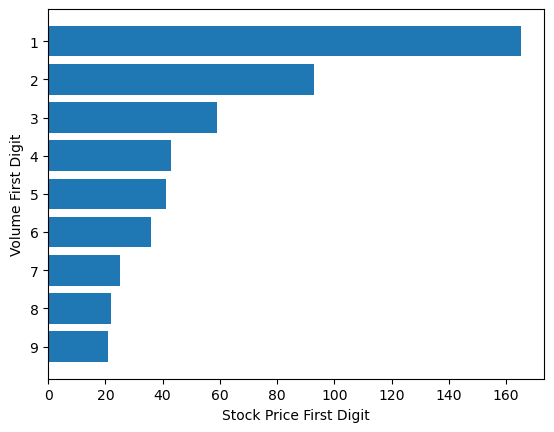

In [4]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

plt.rcdefaults()
fig, ax = plt.subplots()

digits = ('1', '2', '3', '4', '5', '6', '7', '8', '9')
ypos = np.arange(len(digits))
digitcnts = first_digits.value_counts()

ax.barh(ypos, digitcnts, align = 'center')
ax.set_yticks(ypos)
ax.set_yticklabels(digits)
ax.invert_yaxis()
ax.set_xlabel('Stock Price First Digit')
ax.set_ylabel('Volume First Digit')

plt.show()

percentage of the values do you think will have a _first_ digit of 1 = 32.7%
    this was signifcantly greater than my initial prediction of 25%
    
percentage of the values do you think will have a _first_ digit of 9 = 4.16%
    this is 0.16% greater than my initial prediction of 4%


## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

In [5]:
df.volume = df.volume.apply(str)
lastdigits = df.volume.str[-1]
lastdigits.value_counts()

8    56
2    56
1    53
9    53
7    52
0    52
6    51
3    48
5    44
4    40
Name: volume, dtype: int64

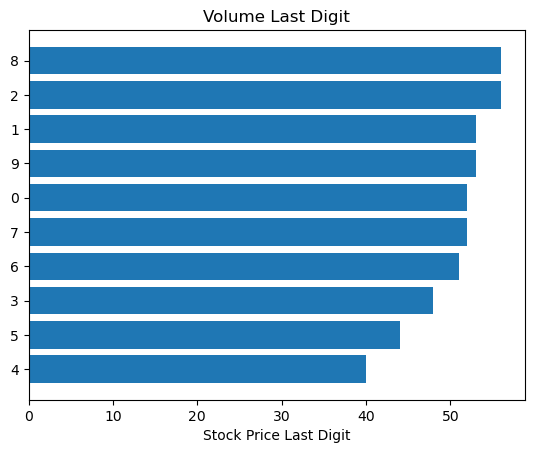

In [6]:

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcdefaults()
fig, ax = plt.subplots()

digits = ('8', '2', '1', '9', '0', '7', '6', '3', '5', '4')
ypos = np.arange(len(digits))
digitcnts = lastdigits.value_counts()

ax.barh(ypos, digitcnts, align = 'center')
ax.set_yticks(ypos)
ax.set_yticklabels(digits)
ax.invert_yaxis()
ax.set_xlabel('Stock Price Last Digit')
ax.set_title('Volume Last Digit')

plt.show()

actual percentage of the values do you think will have a _last_ digit of 1 = 10.5%
actual percentage of the values do you think will have a _last_ digit of 9 = 10.5%

Both values are 0.5% greater than my initial prediction

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

In [7]:
df.close = df.close.apply(str)
firstdigits = df.close.str[1]
firstdigits.value_counts()

1    171
2     55
3     52
6     48
7     43
4     43
5     39
8     28
9     26
Name: close, dtype: int64

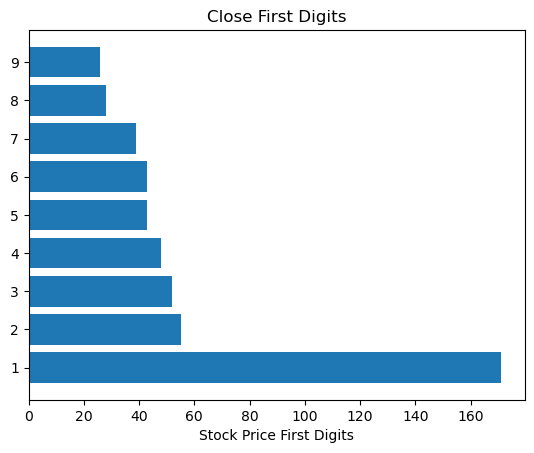

In [8]:

# ENTER YOUR CODE HERE.
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

digits = ('1', '2', '3', '4', '5', '6', '7', '8', '9')
yppos = np.arange(len(digits))
digitcnts = firstdigits.value_counts()

ax.barh(yppos, digitcnts, align = 'center')
ax.set_yticks(yppos)
ax.set_yticklabels(digits)
ax.set_xlabel('Stock Price First Digits')
ax.set_title('Close First Digits')

plt.show()

I used str[1] to get the first digit as str[0] would output the "$" rather than a numberical number.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Demo your lab to obtain credit.  

2. Upload your .ipyn Notebook to iLearn and pdf to Gradescope.